In [7]:
#upload and check size of data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = './pokemon.csv'
df = pd.read_csv(data)
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Hypotheses:
Most common typing is Water
More Legendaries are added per Generation
Fewer Pokemon are added per Generation
Majority of Pokemon are Dual Types
Dragon types have the highest average stats

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [9]:
#check for duplicates in rows - Length = 800 therefore no duplicates
df.duplicated().value_counts()

False    800
dtype: int64

In [10]:
#Check that no entry has same typing in both Primary and Secondary Typing
(df['Type 1'] == df['Type 2']).value_counts()

False    800
dtype: int64

In [11]:
#Check how many variants there are of different pokemon - Repeat values in pokedex number entry = variants
#can check variants per Generation
variants = df[df['#'].duplicated() == True]
for generation in range(6):
    print(variants[variants['Generation'] == generation])

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
       #                       Name   Type 1    Type 2  Total   HP  Attack  \
3      3      VenusaurMega Venusaur    Grass    Poison    625   80     100   
7      6  CharizardMega Charizard X     Fire    Dragon    634   78     130   
8      6  CharizardMega Charizard Y     Fire    Flying    634   78     104   
12     9    BlastoiseMega Blastoise    Water       NaN    630   79     103   
19    15      BeedrillMega Beedrill      Bug    Poison    495   65     150   
23    18        PidgeotMega Pidgeot   Normal    Flying    579   83      80   
71    65      AlakazamMega Alakazam  Psychic       NaN    590   55      50   
87    80        SlowbroMega Slowbro    Water   Psychic    590   95      75   
102   94          GengarMega Gengar    Ghost    Poison    600   60      65   
124  115  KangaskhanMega Kangaskhan   Normal       NaN    590  105     125   
137  

In [12]:
#Check for null values
#Null values shown in Type 2 as not all Pokemon will have secondary typings
for col in df:
    print(df[col].isnull().value_counts())

False    800
Name: #, dtype: int64
False    800
Name: Name, dtype: int64
False    800
Name: Type 1, dtype: int64
False    414
True     386
Name: Type 2, dtype: int64
False    800
Name: Total, dtype: int64
False    800
Name: HP, dtype: int64
False    800
Name: Attack, dtype: int64
False    800
Name: Defense, dtype: int64
False    800
Name: Sp. Atk, dtype: int64
False    800
Name: Sp. Def, dtype: int64
False    800
Name: Speed, dtype: int64
False    800
Name: Generation, dtype: int64
False    800
Name: Legendary, dtype: int64


In [13]:
#if Total Check = 0 means sum of stats is correct
df['Total Check'] = df['HP']+df['Attack']+df['Defense']+df['Sp. Atk']+df['Sp. Def']+df['Speed'] - df['Total']
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Check
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,0


In [14]:
#Total check to see if all values match
(df['Total Check'] == 0).value_counts()

True    800
Name: Total Check, dtype: int64

In [15]:
df.drop(columns = ['Total Check'])

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [16]:
#Produce a copy of the original dataframe removing the variants of each Pokemon - leaving the original formes of the 721 pokemon
standard = df.drop(variants.index, inplace = False)

In [17]:
standard

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Check
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True,0
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,0
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,0


In [18]:
#Check how many pokemon there in standard formes of primary typings
primary = standard['Type 1'].value_counts()
primary

Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type 1, dtype: int64

In [19]:
#Check how many pokemon there in standard formes of secondary typings
secondary = standard['Type 2'].value_counts()
secondary

Flying      87
Poison      31
Ground      30
Psychic     27
Fighting    19
Steel       19
Fairy       18
Grass       18
Dark        16
Dragon      14
Rock        14
Water       13
Ghost       12
Ice         10
Fire         9
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [20]:
#all pokemon of given types - we already checked that no entries have primary and secondary as same typing
tot_Types = primary + secondary
tot_Types

Bug          66
Dark         44
Dragon       38
Electric     42
Fairy        35
Fighting     44
Fire         56
Flying       90
Ghost        35
Grass        84
Ground       60
Ice          33
Normal       97
Poison       59
Psychic      74
Rock         55
Steel        41
Water       118
dtype: int64

In [21]:
#create a list of the colours based on hexcolours for each type from the game based on alphabetical order
colors = ['#94BC4A','#736C75','#6A7BAF','#E5C531','#E397D1','#CB5F48','#EA7A3C','#7DA6DE','#846AB6','#71C558','#CC9F4F','#70CBD4','#AAB09F','#B468B7','#E5709B','#B2A061','#89A1B0','#539AE2']

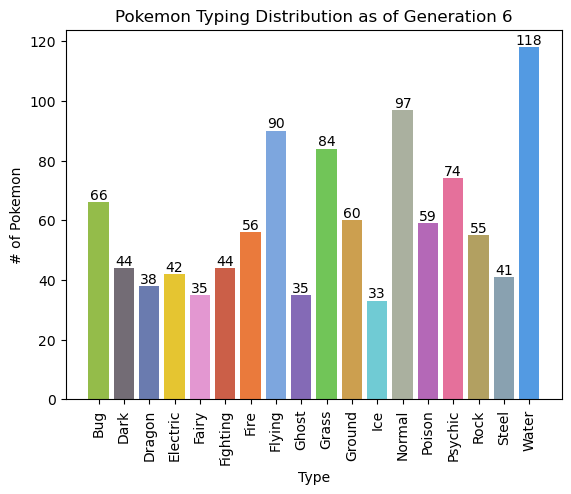

In [22]:
#bar chart plotting x,y , colours of bars
#labelling x and y axis 
#rotating the categorical labels to avoid overlap
#title
#attaching data labels to the bars
plot2 = plt.bar(tot_Types.index,tot_Types,color = colors)
plt.ylabel('# of Pokemon')
plt.xlabel('Type')
plt.xticks(rotation = 90)
plt.title('Pokemon Typing Distribution as of Generation 6')
plt.bar_label(plot2,labels = tot_Types,label_type = 'edge')
plt.show()


In [23]:
#Pure vs Dual Typing Pokemon - No variants/formes
dual_type = standard['Type 2'].isnull().value_counts()
dual_type

True     371
False    350
Name: Type 2, dtype: int64

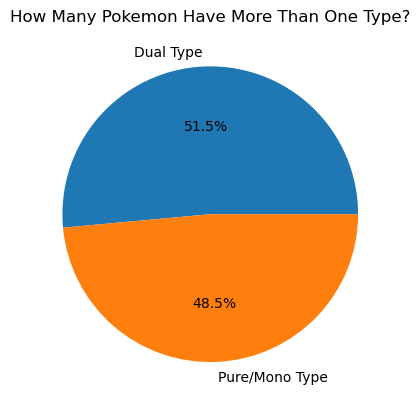

In [24]:


plt.pie(dual_type,labels = ['Dual Type', 'Pure/Mono Type'],autopct= '%.1f%%')
plt.title('How Many Pokemon Have More Than One Type?')
plt.ylabel("")
plt.show()

In [25]:
#Masks to filter Legendary Pokemon count per Generation not including formes/Mega evolutions
legendary_gen = standard[standard['Legendary'] == True]['Generation'].value_counts()
legendary_gen.sort_index(inplace=True)
legendary_gen

1     4
2     5
3    10
4    11
5    10
6     6
Name: Generation, dtype: int64

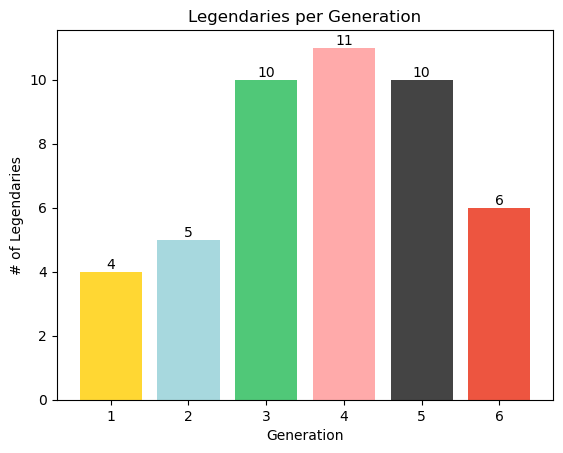

In [31]:
#Plot bar chart of count vs generation - colors used correspond to specific games of Gen - Yellow, Crystal, Emerald, Pearl, Black, Y
plot4 = plt.bar(legendary_gen.index,legendary_gen,color = ['#ffd733','#a7d8de','#50C878','#ffaaaa','#444444','#ed5540'])
plt.ylabel('# of Legendaries')
plt.xlabel('Generation')
plt.bar_label(plot4,labels = legendary_gen,label_type = 'edge')
plt.title('Legendaries per Generation')
plt.show()

In [32]:
#How many Mega Evolutions introduced in Gen 6
#Use of variants dataframe instead of the original dataframe because a pokemon called Meganium exists
#This would be added into our Generation 2 filter for contains 'Mega' - 
#alternatively could use 'Mega ' as the space would differentiate
#For loop to go through every generation - 
Megas = variants[variants['Name'].str.contains('Mega')]
for generation in range(6):
    print(Megas[Megas['Generation'] == generation])

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
       #                       Name   Type 1    Type 2  Total   HP  Attack  \
3      3      VenusaurMega Venusaur    Grass    Poison    625   80     100   
7      6  CharizardMega Charizard X     Fire    Dragon    634   78     130   
8      6  CharizardMega Charizard Y     Fire    Flying    634   78     104   
12     9    BlastoiseMega Blastoise    Water       NaN    630   79     103   
19    15      BeedrillMega Beedrill      Bug    Poison    495   65     150   
23    18        PidgeotMega Pidgeot   Normal    Flying    579   83      80   
71    65      AlakazamMega Alakazam  Psychic       NaN    590   55      50   
87    80        SlowbroMega Slowbro    Water   Psychic    590   95      75   
102   94          GengarMega Gengar    Ghost    Poison    600   60      65   
124  115  KangaskhanMega Kangaskhan   Normal       NaN    590  105     125   
137  

In [33]:
mega_gen = Megas['Generation'].value_counts()
mega_gen.sort_index(inplace=True)
mega_gen

1    15
2     6
3    20
4     5
5     1
6     1
Name: Generation, dtype: int64

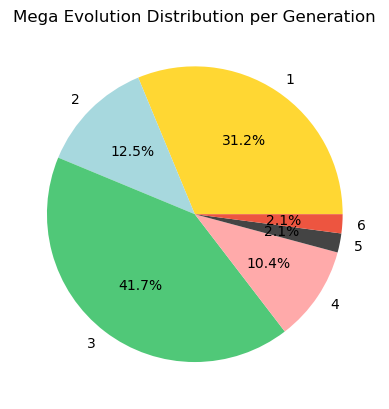

In [34]:
plt.pie(mega_gen,autopct= '%.1f%%',labels = mega_gen.index,colors = ['#ffd733','#a7d8de','#50C878','#ffaaaa','#444444','#ed5540'])
plt.title('Mega Evolution Distribution per Generation')
plt.ylabel("")
plt.show()

In [35]:
count_per_gen = standard['Generation'].value_counts()
count_per_gen.sort_index(inplace=True)
count_per_gen


1    151
2    100
3    135
4    107
5    156
6     72
Name: Generation, dtype: int64

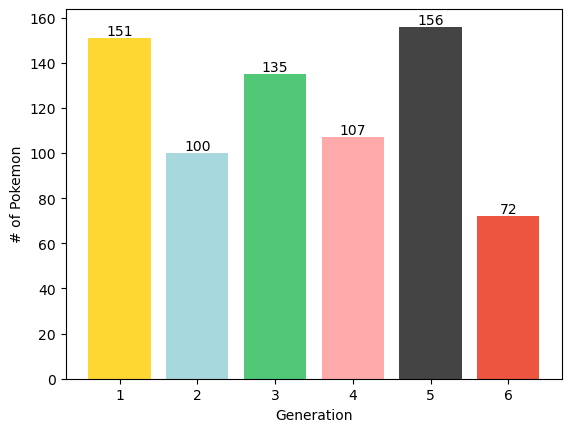

In [36]:
plot5 = plt.bar(count_per_gen.index,count_per_gen,color = ['#ffd733','#a7d8de','#50C878','#ffaaaa','#444444','#ed5540'])
plt.ylabel('# of Pokemon')
plt.xlabel('Generation')
plt.bar_label(plot5,labels = count_per_gen,label_type = 'edge')
plt.show()

In [47]:
#add all values of stats primary typings together
standard.groupby('Type 1').sum(numeric_only = True)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Check
Type 1,,,,,,,,,,,
Bug,21686,23003,3525,4109,4265,3404,3916,3784,208,0,0
Dark,13412,12173,1881,2415,1902,1974,1890,2111,117,2,0
Dragon,11591,12047,1873,2463,1899,1979,1993,1840,95,7,0
Electric,12466,15145,2142,2440,2127,2991,2438,3007,114,3,0
Fairy,7642,7024,1260,1046,1117,1335,1440,826,70,1,0
Fighting,9068,10109,1756,2368,1607,1214,1592,1572,84,0,0
Fire,15878,20822,3224,3864,3050,3923,3265,3496,154,5,0
Flying,2070,1360,204,215,185,267,200,289,17,1,0
Ghost,10370,9744,1416,1533,1767,1850,1779,1399,90,1,0


In [48]:
#add all values of stats secondary typings together
standard.groupby('Type 2').sum(numeric_only = True)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Check
Type 2,,,,,,,,,,,
Bug,1146,1180,160,270,240,140,185,185,10,0,0
Dark,6860,7108,1166,1577,1052,1191,952,1170,63,0,0
Dragon,7758,6917,1091,1245,1176,1213,1122,1070,65,3,0
Electric,2794,2732,529,436,410,487,441,429,24,1,0
Fairy,6549,6680,1133,897,1163,1155,1314,1018,62,1,0
Fighting,8574,9284,1476,1898,1481,1464,1479,1486,78,3,0
Fire,4691,4185,630,640,605,930,715,665,39,2,0
Flying,28809,37689,6101,6571,5691,6132,5995,7199,270,9,0
Ghost,6741,5030,718,1043,877,890,828,674,58,1,0


In [50]:
#combine stats between primary and secondary typings so Pokemon of e.g. normal covers both primary and secondary
standard.groupby('Type 1').sum(numeric_only = True) + standard.groupby('Type 2').sum(numeric_only = True)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Check
Type 1,,,,,,,,,,,
Bug,22832,24183,3685,4379,4505,3544,4101,3969,218,0,0
Dark,20272,19281,3047,3992,2954,3165,2842,3281,180,2,0
Dragon,19349,18964,2964,3708,3075,3192,3115,2910,160,10,0
Electric,15260,17877,2671,2876,2537,3478,2879,3436,138,4,0
Fairy,14191,13704,2393,1943,2280,2490,2754,1844,132,2,0
Fighting,17642,19393,3232,4266,3088,2678,3071,3058,162,3,0
Fire,20569,25007,3854,4504,3655,4853,3980,4161,193,7,0
Flying,30879,39049,6305,6786,5876,6399,6195,7488,287,10,0
Ghost,17111,14774,2134,2576,2644,2740,2607,2073,148,2,0


In [51]:
#average values per pokemon across typings regardless of primary or secondary
avg_per_type = (standard.groupby('Type 1').sum(numeric_only = True) + standard.groupby('Type 2').sum(numeric_only = True)).div(tot_Types,axis = 0).round()

In [268]:
#overwrite the dataframe to drop columns irrelevant to the main 6 stats
avg_per_type = avg_per_type.drop(columns = ['Total','#','Generation','Legendary','Total Check'],inplace = False)
avg_per_type

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,56.0,66.0,68.0,54.0,62.0,60.0
Dark,69.0,91.0,67.0,72.0,65.0,75.0
Dragon,78.0,98.0,81.0,84.0,82.0,77.0
Electric,64.0,68.0,60.0,83.0,69.0,82.0
Fairy,68.0,56.0,65.0,71.0,79.0,53.0
Fighting,73.0,97.0,70.0,61.0,70.0,70.0
Fire,69.0,80.0,65.0,87.0,71.0,74.0
Flying,70.0,75.0,65.0,71.0,69.0,83.0
Ghost,61.0,74.0,76.0,78.0,74.0,59.0


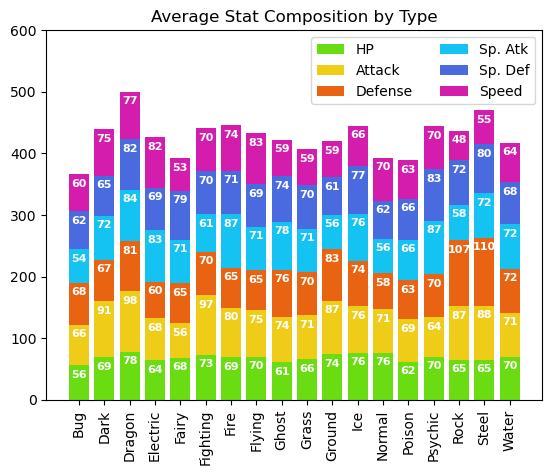

In [351]:
#plotting stat average stat distribution per type- colors correspond to those reflecting of the game in the Pokemon DB
fig, ax = plt.subplots()
bottom = np.zeros(len(avg_per_type))
colors = ['#69DC12','#EFCC18','#E86412','#14C3F1','#4A6ADF','#D51DAD']
#for loop to go through every stat per given type - stack the stat value on top eachother 
#using a counter of 'bottom' as the base of the bar
for type, stat in enumerate(avg_per_type.columns):
  ax.bar(avg_per_type.index, avg_per_type[stat], bottom=bottom, label=stat,color = colors[type])
  bottom += np.array(avg_per_type[stat])

ax.set_title('Average Stat Composition by Type')
ax.set_ylim(0,600)
plt.xticks(rotation = 90)
#optimal legend location - 1 column takes up too much space
ax.legend(avg_per_type,loc = 0,ncols =2)
y_offset = -20
for bar in ax.patches:
  ax.text(
      # Horizontal Text Alignment within the bars. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertical ALignment, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show - the actual stat
      round(bar.get_height()),
      #Font and alignment
      ha='center',
      color='w',
      weight='bold',
      size=8)